In [2]:
from bqplot import pyplot as plt
import ipywidgets as widgets
import numpy as np
from ipywidgets import interactive
from IPython.display import display

In [6]:
img =  widgets.HTML('<div id="img" style="float:left">'
                    '<img style="vertical-align:middle" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/FIFA_21_logo.svg/1200px-FIFA_21_logo.svg.png" alt="" height="100">'                       
                    '<h1 style="font-family:verdana;">Exploratory Data Analysis</h1>'
                    '<h2 style="font-family:verdana;">by: Steven Truong</h2>'
                    '<p>This project contains several data analysis about football player and team based on FIFA21 dataset.'
                    ' The contents of this project are:'
                    '<ol>'
                    '<li> Data statistic that can be filtered and sorted by some categories</li>'
                    '<li> Histogram showing the distirbution of each category</li>'
                    '<li> A statistics comparing the average of age, overall and wage of each country</li>'
                    '<li> Best starting lineup based on country, formation and age</li>'
                    '<li> Correlation between Age or Wage with player overall</li>'
                    '<li> Classifier comparison to predict the best position according to the abilities.</li>'
                    '</ol>'
                    'The data is cleaned first because there are some players who do not have a club and some missing values related to league name. '
                    'Some csv files are obtained from https://github.com/batuhan-demirci/fifa21_dataset/tree/master/data. '
                    'Those csv files need to be concatenate as one dataframe.</p>'
                    '</div>')
img

HTML(value='<div id="img" style="float:left"><img style="vertical-align:middle" src="https://upload.wikimedia.…

#1. Data statistic that can be filtered and sorted by some categories
This feature is useful for a manager which can look into a table contains some player data filtered by country, team, position and age and sorted by overall, wage and age.

In [2]:
import pandas as pd
num_data = 10000 # reduce the data to make this program running faster
df_player=pd.read_csv('tbl_player.csv',nrows=num_data)
df_team=pd.read_csv('tbl_team.csv',nrows=num_data)
pd.set_option('display.max_rows', None)

In [3]:
#check missing value
#df_player.isna().any().any()

In [4]:
#df_player.info()

In [5]:
#df_player[df_player['int_team_id'].isna()]

In [6]:
df_player['int_team_id'].fillna(0.0,inplace=True)
#df_player.info()

In [7]:
#df_team.isna().any().any()

In [8]:
#cleaning data team
#df_team.info()

In [9]:
#df_team[df_team['str_league'].isna()]

In [10]:
#df_team['str_league'].unique()

In [11]:
df_team.at[29,'str_league']='Italian Serie A (1)'
df_team.at[235,'str_league']='Italian Serie A (1)'
#df_team.info()

In [12]:
#df_team

In [13]:
# add age
from datetime import date,datetime

today = datetime.now()
list_age = []
for index, row in df_player.iterrows():
    date_of_birth = pd.to_datetime(row['dt_date_of_birth'], format='%Y-%m-%d', errors='ignore')
    diff=today-date_of_birth
    #print(row['dt_date_of_birth'],round(diff.days/365,2))
    list_age.append(int(diff.days/365))
df_player['age']=list_age
#df_player.head()

In [14]:
list_team_name = ['No Team']+df_team['str_team_name'].to_list()
#list_team_name

In [15]:
list_team = []
for index, row in df_player.iterrows():
    list_team.append(list_team_name[int(row['int_team_id'])])
df_player['team']=list_team
#df_player.head()

In [16]:
country_list = list(df_player["str_nationality"].unique())
country_list.sort()
country_list = ['All']+country_list

In [17]:
#country_list

In [18]:
country_combobox1=widgets.Combobox(
    value='All',
    placeholder='Choose Country',
    options=country_list,
    description='Country:',
    ensure_option=True,
    disabled=False
)
country_combobox2=widgets.Combobox(
    value='All',
    placeholder='Choose Country',
    options=country_list,
    description='Country:',
    ensure_option=True,
    disabled=False
)

In [19]:
list_team=list(set(list_team))

In [20]:
team_combobox=widgets.Combobox(
    value='All',
    placeholder='Choose Team',
    options=list_team,
    description='Team:',
    ensure_option=True,
    disabled=False
)

In [21]:
sort_combobox=widgets.Combobox(
    value='OVR (High)',
    placeholder='Choose Sorter',
    options=['OVR (High)','OVR (Low)','Age (Old)','Age (Young)','Wage (High)','Wage (Low)'],
    description='Sort:',
    ensure_option=True,
    disabled=False
)

In [22]:
pos_list=list(df_player['str_best_position'].unique())
pos_list=['All']+pos_list

In [23]:
pos_combobox=widgets.Combobox(
    value='All',
    placeholder='Choose Pos',
    options=pos_list,
    description='Pos:',
    ensure_option=True,
    disabled=False
)

In [24]:
age_slider1=widgets.IntRangeSlider(
    value=[17, 45],
    min=17,
    max=45,
    step=1,
    description='Age range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
age_slider2=widgets.IntRangeSlider(
    value=[17, 45],
    min=17,
    max=45,
    step=1,
    description='Age range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [25]:

max_data_bounded_text1=widgets.BoundedIntText(
    value=20,
    min=5,
    max=500,
    step=1,
    description='Max data:',
    disabled=False
)
max_data_bounded_text2=widgets.BoundedIntText(
    value=20,
    min=5,
    max=100,
    step=1,
    description='Max data:',
    disabled=False
)

In [26]:
df_player_summary = df_player[["str_player_name","team","str_nationality","age","int_best_overall_rating",'str_best_position','int_wage']]
df_player_summary = df_player_summary.rename(columns={'str_player_name': 'Name','team': 'Team','str_nationality': 'Nation','age': 'Age','int_best_overall_rating': 'OVR','str_best_position':'POS','int_wage': 'Wage'})
def view_table(x,y,p,s,a,m):
    df_filtered = df_player_summary
    df_filtered = df_filtered[(a[0] <= df_filtered['Age'])&(df_filtered['Age'] <= a[1])]  
    if(len(x)>0 and len(y)>0 and len(p)>0):
        if(x == "All") and (y=="All") and (p=="All"):
            pass
        else:
            if(x != "All"): # filter country
                df_filtered = df_filtered[df_filtered['Nation'] == x]  
            if(y != "All"): # filter team
                df_filtered = df_filtered[df_filtered['Team'] == y] 
            if(p != "All"): # filter pos
                df_filtered = df_filtered[df_filtered['POS'] == p]  
            
    if(len(s)>0):
        if(s == 'OVR (High)'):
            df_filtered=df_filtered.sort_values(by=['OVR'],ascending=False)
        elif(s == 'OVR (Low)'):
            df_filtered=df_filtered.sort_values(by=['OVR'])
        elif(s == 'Age (Old)'):
            df_filtered=df_filtered.sort_values(by=['Age'],ascending=False)
        elif(s == 'Age (Young)'):
            df_filtered=df_filtered.sort_values(by=['Age'])
        elif(s == 'Wage (High)'):
            df_filtered=df_filtered.sort_values(by=['Wage'],ascending=False)
        elif(s == 'Wage (Low)'):
            df_filtered=df_filtered.sort_values(by=['Wage'])
    if(len(x)>0 and len(y)>0 and len(p)>0)or(len(s)>0):
        #display(df_filtered)
        df_filtered.index = np.arange(1, len(df_filtered) + 1)
        if(len(df_filtered) > m):
            display(df_filtered[0:m:])
        else:
            display(df_filtered)
            
#    return 
widgets.interactive(view_table,x=country_combobox1,y=team_combobox,p=pos_combobox,s=sort_combobox,a=age_slider1,m=max_data_bounded_text1)

interactive(children=(Combobox(value='All', description='Country:', ensure_option=True, options=('All', 'Afgha…

#2. Histogram showing the distirbution of each category

In [27]:
cat_combobox=widgets.Combobox(
    value='Nation',
    placeholder='Choose Hist',
    options=['Nation','Team','Age','OVR','Wage','POS'],
    description='Category:',
    ensure_option=True,
    disabled=False
)
bin_slider=widgets.IntSlider(
    value=10,
    min=2,
    max=20,
    step=1,
    description='Bins:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [28]:
import matplotlib.pyplot as plt
def view_histogram(c,b):
    if(len(c)>0):
        if(c in ['Age','OVR','Wage']):
            df_player_summary.hist(column=c,bins=b)
        else:
            df_series = df_player_summary[c].value_counts()
            df_series=df_series[:b].sort_values()
            if(c == 'Nation'):
                df_series.plot(kind='barh')
            else:
                df_series.plot(kind='barh')
widgets.interactive(view_histogram,c=cat_combobox,b=bin_slider)

interactive(children=(Combobox(value='Age', description='Category:', ensure_option=True, options=('Nation', 'T…

#3. A statistics comparing the average of age, overall and wage of each country

In [29]:
# country statistic
def view_country_statistic(s,m):
    if(len(s)>0):
        df_sorted = df_player_summary.groupby('Nation').mean()
        df_sorted = df_sorted.rename(columns={'Age': 'Avg. Age','OVR': 'Avg. OVR','Wage': 'Avg. Wage'})
        if(s == 'OVR (High)'):
            df_sorted=df_sorted.sort_values(by=['Avg. OVR'],ascending=False)
        elif(s == 'OVR (Low)'):
            df_sorted=df_sorted.sort_values(by=['Avg. OVR'])
        elif(s == 'Age (Old)'):
            df_sorted=df_sorted.sort_values(by=['Avg. Age'],ascending=False)
        elif(s == 'Age (Young)'):
            df_sorted=df_sorted.sort_values(by=['Avg. Age'])
        elif(s == 'Wage (High)'):
            df_sorted=df_sorted.sort_values(by=['Avg. Wage'],ascending=False)
        elif(s == 'Wage (Low)'):
            df_sorted=df_sorted.sort_values(by=['Avg. Wage'])
        display(df_sorted[0:m:])
widgets.interactive(view_country_statistic,s=sort_combobox,m=max_data_bounded_text2)


interactive(children=(Combobox(value='OVR (High)', description='Sort:', ensure_option=True, options=('OVR (Hig…

#4. Best starting lineup based on country, formation and age
This is useful for a manager/game player to decide what formation that creates best starting lineup. It returns the average overall. 

In [30]:
#best lineup country
#at least need one GK 
#formation: 433,442,451,361,352,343,541,532
formation_combobox=widgets.Combobox(
    value='4-3-3',
    placeholder='Choose Formation',
    options=['4-3-3','4-4-2','4-5-1','3-6-1','3-5-2','3-4-3','5-4-1','5-3-2'],
    description='Formation:',
    ensure_option=True,
    disabled=False
)
# attacker(A): RW,ST,LW,CF
# midfielder(M): CAM,CDM,LM,CM,RM
# defender(D): CB,LB,RB,RWB,LWB

def view_best_lineup(c,f,a):
    df_filtered=df_player_summary
    if(len(c)>0 and len(f)>0):
        if(c == "All"):
            pass
        else:
            df_filtered = df_filtered[df_filtered['Nation'] == c]  
        df_filtered = df_filtered[(df_filtered['Age'] >= a[0])&(df_filtered['Age'] <= a[1])]
        df_AC=df_filtered[(df_filtered['POS']=='ST') | (df_filtered['POS']=='CF')]
        df_AC=df_AC.sort_values(by=['OVR'],ascending=False)
        df_AL=df_filtered[df_filtered['POS']=='LW']
        df_AL=df_AL.sort_values(by=['OVR'],ascending=False)
        df_AR=df_filtered[df_filtered['POS']=='RW']
        df_AR=df_AR.sort_values(by=['OVR'],ascending=False)
        df_MC=df_filtered[(df_filtered['POS']=='CM') | (df_filtered['POS']=='CAM') | (df_filtered['POS']=='CDM')]
        df_MC=df_MC.sort_values(by=['OVR'],ascending=False)
        df_MR=df_filtered[df_filtered['POS']=='RM']
        df_MR=df_MR.sort_values(by=['OVR'],ascending=False)
        df_ML=df_filtered[df_filtered['POS']=='LM']
        df_ML=df_ML.sort_values(by=['OVR'],ascending=False)
        df_DC=df_filtered[df_filtered['POS']=='CB']
        df_DC=df_DC.sort_values(by=['OVR'],ascending=False)
        df_DL=df_filtered[(df_filtered['POS']=='LB') | (df_filtered['POS']=='LWB')]
        df_DL=df_DL.sort_values(by=['OVR'],ascending=False)
        df_DR=df_filtered[(df_filtered['POS']=='RB') | (df_filtered['POS']=='RWB')]
        df_DR=df_DR.sort_values(by=['OVR'],ascending=False)
        df_G=df_filtered[df_filtered['POS']=='GK']
        df_G=df_G.sort_values(by=['OVR'],ascending=False)
        if(f=='4-3-3'):
            frames=[df_G[0:1:],df_DC[0:2:],df_DL[0:1:],df_DR[0:1:],df_MC[0:1:],df_ML[0:1:],df_MR[0:1:],df_AL[0:1:],df_AR[0:1:],df_AC[0:1:]]
        elif(f=='4-4-2'):
            frames=[df_G[0:1:],df_DC[0:2:],df_DL[0:1:],df_DR[0:1:],df_MC[0:2:],df_ML[0:1:],df_MR[0:1:],df_AC[0:2:]]
        elif(f=='4-5-1'):
            frames=[df_G[0:1:],df_DC[0:2:],df_DL[0:1:],df_DR[0:1:],df_MC[0:3:],df_ML[0:1:],df_MR[0:1:],df_AC[0:1:]]
        elif(f=='3-6-1'):
            frames=[df_G[0:1:],df_DC[0:3:],df_MC[0:3:],df_ML[0:1:],df_MR[0:1:],df_AC[0:1:]]
        elif(f=='3-5-2'):
            frames=[df_G[0:1:],df_DC[0:3:],df_MC[0:3:],df_ML[0:1:],df_MR[0:1:],df_AC[0:2:]]
        elif(f=='3-4-3'):
            frames=[df_G[0:1:],df_DC[0:3:],df_MC[0:2:],df_ML[0:1:],df_MR[0:1:],df_AR[0:1:],df_AL[0:1:],df_AC[0:1:]]
        elif(f=='5-4-1'):
            frames=[df_G[0:1:],df_DC[0:3:],df_DL[0:1:],df_DR[0:1:],df_MC[0:2:],df_ML[0:1:],df_MR[0:1:],df_AC[0:1:]]
        elif(f=='5-3-2'):
            frames=[df_G[0:1:],df_DC[0:3:],df_DL[0:1:],df_DR[0:1:],df_MC[0:1:],df_ML[0:1:],df_MR[0:1:],df_AC[0:2:]]
        df_lineup=pd.concat(frames)
        df_lineup.index = np.arange(1, len(df_lineup) + 1)
        display(df_lineup)
        display("Overall:"+str(round(np.mean(df_lineup['OVR'].to_list()),2)))
        if(len(df_lineup) < 11):
            display("You cannot play a match with this formation. The players are only "+str(len(df_lineup)))
            
widgets.interactive(view_best_lineup,c=country_combobox2,f=formation_combobox,a=age_slider2)

interactive(children=(Combobox(value='All', description='Country:', ensure_option=True, options=('All', 'Afgha…

In [31]:
#df_player_summary["Wage"].max()

In [32]:
#df_player_summary.groupby(pd.cut(df_player_summary["Wage"], np.arange(df_player_summary["Wage"].min(), df_player_summary["Wage"].max(), (df_player_summary["Wage"].max()-df_player_summary["Wage"].min())/10))).mean()

#5. Correlation between Age or Wage with player overall
This plot shows how old is the player tend to decrease football ability and how is the correlation between the wage and the overall.

In [33]:
#statistics average of overall groupby the age and wages
change_ovr_combobox=widgets.Combobox(
    value='Age',
    placeholder='Choose category',
    options=['Age','Wage'],
    description='Cat:',
    ensure_option=True,
    disabled=False
)
def view_overall_change(c):
    if(len(c)>0):
        if(c == 'Age'):
            df_player_summary.groupby('Age').mean()['OVR'].plot(kind='bar')
        else:                
            delta = (df_player_summary["Wage"].max()-df_player_summary["Wage"].min())/10
            df_player_summary.groupby(pd.cut(df_player_summary["Wage"], np.arange(df_player_summary["Wage"].min(), df_player_summary["Wage"].max()+delta, delta))).mean()['OVR'].plot(kind='bar')

                
widgets.interactive(view_overall_change,c=change_ovr_combobox)

interactive(children=(Combobox(value='Age', description='Cat:', ensure_option=True, options=('Age', 'Wage'), p…

In [34]:
#df_player.shape

In [35]:
#df_player.head()

In [36]:
df_ability_attack = pd.read_csv('tbl_player_attacking.csv',nrows=num_data)
df_ability_defend = pd.read_csv('tbl_player_defending.csv',nrows=num_data)
df_ability_goalkeeping = pd.read_csv('tbl_player_goalkeeping.csv',nrows=num_data)
df_ability_mental = pd.read_csv('tbl_player_mentality.csv',nrows=num_data)
df_ability_movement = pd.read_csv('tbl_player_movement.csv',nrows=num_data)
df_ability_power = pd.read_csv('tbl_player_power.csv',nrows=num_data)
df_ability_skill = pd.read_csv('tbl_player_skill.csv',nrows=num_data)


In [37]:
#print(df_ability_attack.isna().any().any())
#print(df_ability_defend.isna().any().any())
#print(df_ability_goalkeeping.isna().any().any())
#print(df_ability_mental.isna().any().any())
#print(df_ability_movement.isna().any().any())
#print(df_ability_power.isna().any().any())
#print(df_ability_skill.isna().any().any())

In [38]:
#df_ability_skill.head()

In [39]:
df_ability_attack=df_ability_attack.drop(["int_attacking_id"],axis=1)
df_ability_defend=df_ability_defend.drop(["int_defending_id"],axis=1)
df_ability_goalkeeping=df_ability_goalkeeping=df_ability_goalkeeping.drop(["int_goalkeeping_id"],axis=1)
df_ability_mental=df_ability_mental.drop(["int_mentality_id"],axis=1)
df_ability_movement=df_ability_movement.drop(["int_movement_id"],axis=1)
df_ability_power=df_ability_power.drop(["int_power_id"],axis=1)
df_ability_skill=df_ability_skill.drop(["int_skill_id"],axis=1)

df_player=pd.concat([df_player,df_ability_attack,df_ability_defend,df_ability_goalkeeping,df_ability_mental,df_ability_movement,df_ability_power,df_ability_skill],axis=1)
#df_player.head()

In [40]:
#classification
#split data
from sklearn.model_selection import train_test_split
df_player.str_best_position=pd.Categorical(df_player.str_best_position)
df_player['int_best_position']=df_player.str_best_position.cat.codes
X = df_player.drop(['int_player_id','str_player_name','str_positions','dt_date_of_birth','int_overall_rating','int_potential_rating','str_best_position','int_best_overall_rating','int_value','int_wage','str_player_image_url','int_team_id','str_nationality','age','team','int_best_position'],axis=1)
y = df_player['int_best_position']
from sklearn import preprocessing

x = X.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [41]:
#y.head()

In [42]:
#X.head()

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)

In [44]:
data_Xy = pd.concat([X,y],axis=1) 
#data_Xy.corr()

In [45]:
#data_Xy.corr()["int_best_position"]

#6. Classifier comparison to predict the best position according to the abilities.
Four classifier are used to predict the best position from the player abilities. The data is randomly splitted to 20% testing data and 80% training data. Before creating the classification model, some category that are not corellated are dropped and then normalized.

<AxesSubplot:>

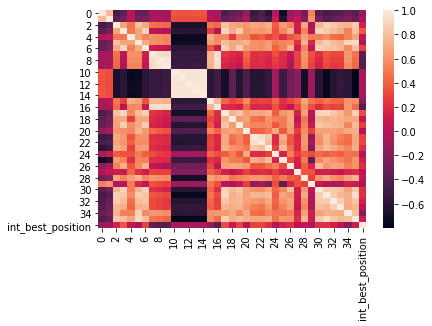

In [46]:
import seaborn as sns
#sns.heatmap(data_Xy.corr())

In [47]:
change_ovr_combobox=widgets.Combobox(
    value='K-Nearest Neighbor',
    placeholder='Choose classifier',
    options=['K-Nearest Neighbor','Decision Tree','Support Vector Machine','Logistic Regression'],
    description='Classifier:',
    ensure_option=True,
    disabled=False
)

In [48]:
def percent_match(a,b):
    a=list(a)
    b=list(b)
    match=0
    for i in range(len(a)):
        if(a[i]==b[i]):
            match += 1
    return round(match/len(a)*100.0,4)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
def view_classifier_result(c):
    if(len(c)>0):
        display("waiting for classification..")
        if(c=='K-Nearest Neighbor'):
            knn_model=KNeighborsClassifier()
            knn_model.fit(X_train,y_train)
            y_pred = knn_model.predict(X_test)
        elif(c=='Decision Tree'):
            dt_model=DecisionTreeClassifier()
            dt_model.fit(X_train,y_train)
            y_pred = dt_model.predict(X_test)
        elif(c=='Support Vector Machine'):
            svm_model=SVC()
            svm_model.fit(X_train,y_train)
            y_pred = svm_model.predict(X_test)
        elif(c=='Logistic Regression'):
            lr_model=LogisticRegression(max_iter=1000)
            lr_model.fit(X_train,y_train)
            y_pred = lr_model.predict(X_test)
        display("The "+c+" classifier is successfully predict the best position with accuration: "+str(percent_match(y_pred,y_test))+' %')
        #display(pd.concat([df_player_summary['Name'],df_player_summary['POS'],],axis=1) )
widgets.interactive(view_classifier_result,c=change_ovr_combobox)

interactive(children=(Combobox(value='K-Nearest Neighbor', description='Classifier:', ensure_option=True, opti…